# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

c:\python36\lib\site-packages\matplotlib\__init__.py:1003: UserWarning: Duplicate key in file "c:\python36\lib\site-packages\matplotlib\mpl-data\matplotlibrc", line #196
  (fname, cnt))


In [3]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100

# set the tolerance to a large value to make the example faster
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

參考資料: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [4]:
# 先執行 GridSearchCV 跑出最佳參數
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.912):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


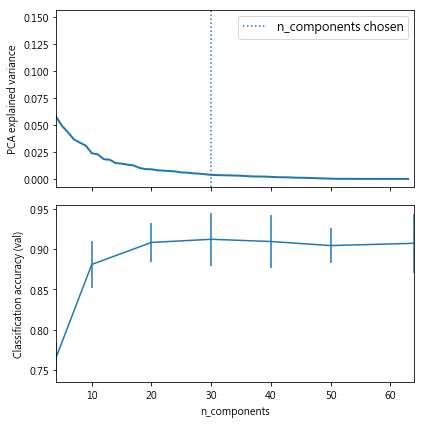

In [14]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

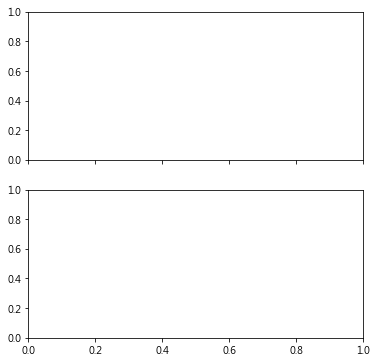

In [11]:
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,0.051868,0.002270,0.000199,0.000398,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.777778,0.738889,0.779944,0.785515,0.743733,0.765172,0.019705,13
10,8,0.058611,0.006385,0.000599,0.000489,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.905556,0.858333,0.891365,0.913649,0.835655,0.880911,0.029483,11
20,9,0.094956,0.022971,0.000594,0.000485,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.927778,0.883333,0.902507,0.944290,0.883008,0.908183,0.024377,4
30,10,0.195462,0.032246,0.000205,0.000410,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.938889,0.866667,0.924791,0.949861,0.880223,0.912086,0.032817,1
40,4,0.114530,0.007585,0.000393,0.000482,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.908333,0.869444,0.927577,0.961003,0.880223,0.909316,0.032991,2
50,12,0.424450,0.034595,0.000991,0.000011,0.01,50,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.891667,0.894444,0.922006,0.935933,0.877437,0.904297,0.021413,6
64,6,0.132496,0.008960,0.000787,0.000394,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.905556,0.861111,0.933148,0.961003,0.874652,0.907094,0.036754,5
